In [1]:
!pip install vanna



  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 5.0 MB/s eta 0:00:00a 0:00:020m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 20.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 21.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 MB/s eta 0:00:00
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
Using cached itsdangerous-2.2.0-py3-none-any.whl (16 kB)
Using cached werkzeug-3.1.3-py3-none-any.whl (224 kB)
  Created wheel for flasgger: filename=flasgger

SQL Prompt: [{'role': 'system', 'content': "You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Artist]\n(\n    [ArtistId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(120),\n    CONSTRAINT [PK_Artist] PRIMARY KEY  ([ArtistId])\n)\n\nCREATE TABLE [Album]\n(\n    [AlbumId] INTEGER  NOT NULL,\n    [Title] NVARCHAR(160)  NOT NULL,\n    [ArtistId] INTEGER  NOT NULL,\n    CONSTRAINT [PK_Album] PRIMARY KEY  ([AlbumId]),\n    FOREIGN KEY ([ArtistId]) REFERENCES [Artist] ([ArtistId]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE INDEX [IFK_AlbumArtistId] ON [Album] ([ArtistId])\n\nCREATE TABLE [Track]\n(\n    [TrackId] INTEGER  NOT NULL,\n    [Name] NVARCHAR(200)  NOT NULL,\n    [AlbumId] INTEGER,\n    [MediaTypeId] INTEGER  NOT NULL,\n    [GenreId] INTEGER,\n    [Composer] NVARCHAR(220),\n    [Milliseconds] INT

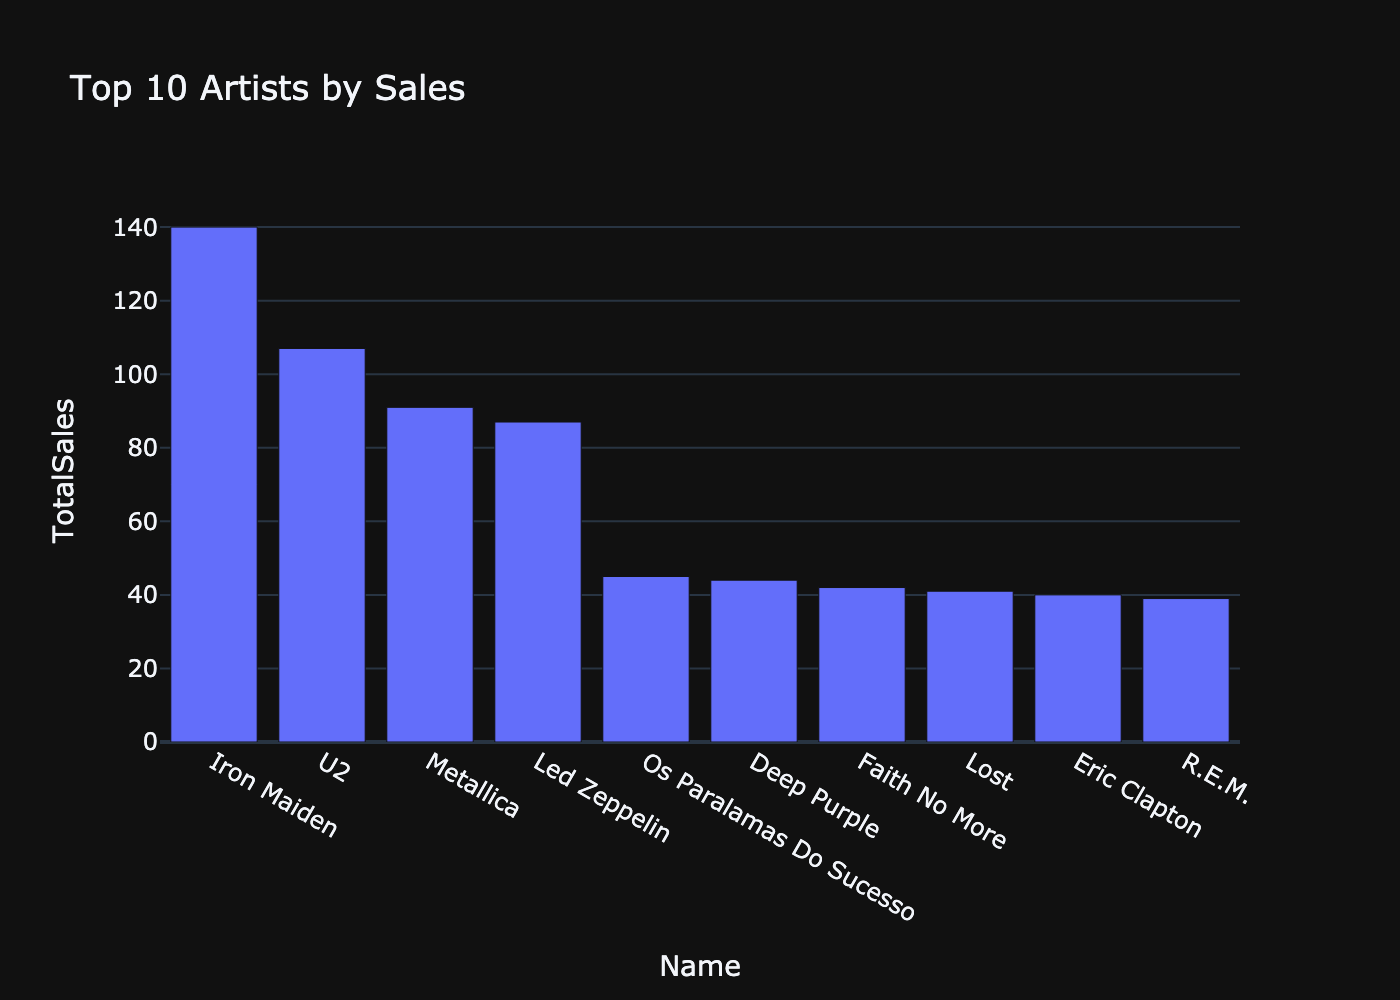

('SELECT a.ArtistId, a.Name, SUM(il.Quantity) AS TotalSales\nFROM Artist a\nJOIN Album al ON a.ArtistId = al.ArtistId\nJOIN Track t ON al.AlbumId = t.AlbumId\nJOIN InvoiceLine il ON t.TrackId = il.TrackId\nGROUP BY a.ArtistId, a.Name\nORDER BY TotalSales DESC\nLIMIT 10;',
    ArtistId                     Name  TotalSales
 0        90              Iron Maiden         140
 1       150                       U2         107
 2        50                Metallica          91
 3        22             Led Zeppelin          87
 4       113  Os Paralamas Do Sucesso          45
 5        58              Deep Purple          44
 6        82            Faith No More          42
 7       149                     Lost          41
 8        81             Eric Clapton          40
 9       124                   R.E.M.          39,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>TotalSales=%{y}<extra></extra>',
               'legendgroup': '',
            

In [4]:
from vanna.remote import VannaDefault
vn = VannaDefault(model='chinook', api_key='d4cadc0e5db247ba8a0b8e48b1bd1481')
vn.connect_to_sqlite('https://vanna.ai/Chinook.sqlite')
vn.ask('What are the top 10 artists by sales?')



In [5]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("nroggendorff/smallama-it")
model = AutoModelForCausalLM.from_pretrained("nroggendorff/smallama-it")

/Users/vexy/Documents/aip/code/AIP/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [8]:
from transformers import pipeline

# Define the table schema (DDL)
ddl = """CREATE TABLE financial_metrics (
    metric_id SERIAL PRIMARY KEY,  -- Unique identifier for each metric
    metric_name TEXT NOT NULL,     -- The name of the financial metric
    year_2007 VARCHAR(50),         -- Value for the year 2007
    year_2006 VARCHAR(50),         -- Value for the year 2006
    year_2005 VARCHAR(50)          -- Value for the year 2005
);"""

# Define the natural language query
nl_query = "By how much did the weighted average exercise price per share increase from 2005 to 2007?"

# Format the prompt for the model
prompt = f"""You are an AI assistant trained to generate SQL queries. 
Given the following table definition (DDL) and a natural language question, generate a valid SQL query.

### Table Schema (DDL)
{ddl}

### Natural Language Query
"{nl_query}"

### Expected SQL Query Output
"""

# Load the text generation pipeline
pipe = pipeline("text-generation", model="nroggendorff/smallama-it")

# Generate the SQL query
response = pipe(prompt, max_length=512, do_sample=True)

# Print the generated SQL query
print(response[0]['generated_text'])


Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


You are an AI assistant trained to generate SQL queries. 
Given the following table definition (DDL) and a natural language question, generate a valid SQL query.

### Table Schema (DDL)
CREATE TABLE financial_metrics (
    metric_id SERIAL PRIMARY KEY,  -- Unique identifier for each metric
    metric_name TEXT NOT NULL,     -- The name of the financial metric
    year_2007 VARCHAR(50),         -- Value for the year 2007
    year_2006 VARCHAR(50),         -- Value for the year 2006
    year_2005 VARCHAR(50)          -- Value for the year 2005
);

### Natural Language Query
"By how much did the weighted average exercise price per share increase from 2005 to 2007?"

### Expected SQL Query Output
, eing k isor andh  g t  bal    u
.=,y then      ses of
  e  e and :     =
e


In [ ]:
from groq import Groq

client = Groq()
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")


In [14]:
from groq import Groq

client = Groq()
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
        {
            "role": "user",
            "content": "Based on the DDL below, answer the query with an SQL query as the only output\nddl = \"\"\"CREATE TABLE financial_metrics (\n    metric_id SERIAL PRIMARY KEY,  -- Unique identifier for each metric\n    metric_name TEXT NOT NULL,     -- The name of the financial metric\n    year_2007 VARCHAR(50),         -- Value for the year 2007\n    year_2006 VARCHAR(50),         -- Value for the year 2006\n    year_2005 VARCHAR(50)          -- Value for the year 2005\n);\"\"\"\n\n##natural language query\nquery = \"By how much did the weighted average exercise price per share increase from 2005 to 2007?\"\n\n"
        },
    ],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=True,
    stop=None,
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")


To answer the query, we need to calculate the difference in the weighted average exercise price per share between 2007 and 2005. Assuming 'weighted average exercise price per share' corresponds to the 'metric_name' 'weighted average exercise price' and that we don't have a specific row for 'weighted average exercise price' in the table, we will still be able to calculate the difference between years by creating the variable in the SQL output.

```sql
SELECT 
  (COALESCE(year_2007, 0) - COALESCE(year_2005, 0)) * 100 / COALESCE(year_2005, 0) AS percentage_increase
FROM 
  financial_metrics
WHERE 
  metric_name = 'weighted average exercise price per share';
```
This query will calculate the percentage increase in the weighted average exercise price per share from 2005 to 2007 by calculating the difference between the year 2007 and year 2005 values, dividing the result by the year 2005 value, and multiplying by 100 for percentage representation. The COALESCE function is used to replace nul

To answer the query, we need to calculate the difference in the weighted average exercise price per share between 2007 and 2005. Assuming 'weighted average exercise price per share' corresponds to the 'metric_name' 'weighted average exercise price' and that we don't have a specific row for 'weighted average exercise price' in the table, we will still be able to calculate the difference between years by creating the variable in the SQL output.

```sql
SELECT 
  (COALESCE(year_2007, 0) - COALESCE(year_2005, 0)) * 100 / COALESCE(year_2005, 0) AS percentage_increase
FROM 
  financial_metrics
WHERE 
  metric_name = 'weighted average exercise price per share';
```
This query will calculate the percentage increase in the weighted average exercise price per share from 2005 to 2007 by calculating the difference between the year 2007 and year 2005 values, dividing the result by the year 2005 value, and multiplying by 100 for percentage representation. The COALESCE function is used to replace null values with 0 to avoid division by zero errors.